In [1]:
# Load packages and settings
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget
from matplotlib import cm # Colormaps
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# ax1.spines['top'].set_visible(False) 

import os
# import csv
import math

from datetime import date


# ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

# Define running mean functions
def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
# Define paths
rootdir_data = os.getcwd() +"/../DanskeData/" 

path_data = rootdir_data + "ssi_data/"
path_dash = rootdir_data + "ssi_dashboard/"
path_vacc = rootdir_data + "ssi_vacc/"

path_figs = os.getcwd() +"/../Figures/" 

In [3]:
latestsubdir = list(os.walk(path_dash))[0][1][-1]
latestdir = path_dash + latestsubdir

df = pd.read_csv(latestdir+'/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv',encoding='latin1',delimiter = ';')
df['Prøvetagningsdato'] = pd.to_datetime(df['Prøvetagningsdato'])

kortdf  = pd.read_csv(latestdir+'/Regionalt_DB/13_regionale_kort.csv',encoding='latin1',delimiter = ';')
kortdf

,Region,Bekræftede tilfælde i alt,Incidens,Bekræftede tilfælde i alt de seneste 7 dage,Incidens de seneste 7 dage,Testede,Test incidens,Testede de seneste 7 dage,Test incidens de seneste 7 dage,Positivprocent de seneste 7 dage,antal_bor
0,Hovedstaden,999727,53666,20575,1104,1762283,94600,90540,4860,"22,72",1862872
1,Midtjylland,672043,50136,22480,1677,1237638,92331,68392,5102,"32,87",1340435
2,Nordjylland,299621,50689,10267,1737,556750,94189,31748,5371,"32,34",591096
3,Sjælland,388024,46078,11123,1321,772972,91791,42301,5023,"26,29",842099
4,Syddanmark,585291,47704,21285,1735,1136063,92595,71649,5840,"29,71",1226920


In [4]:
allRegions = kortdf.Region.values
borgerCount = kortdf.antal_bor.values


In [5]:
# df.groupby('Køn').sum()
# allRegions = df.Region.unique()

groupdf = df.groupby(['Region','Prøvetagningsdato']).sum()
# groupdf[groupdf.index == 'Hovedstaden']
# groupdf.index.names
curdf = groupdf.loc[allRegions[1],:,:]
# curDates = curdf.index.get_level_values(1)
curDates = curdf.index
# curCase = curdf['Bekræftede tilfælde']
curCase = curdf['Bekræftede tilfælde i alt']
curAdm = curdf['Indlæggelser']
curDea = curdf['Døde']

# fig,ax1 = plt.subplots()

# ax1.plot(curDates,curCase)

In [7]:
# curdf.tail()

groupdf.loc[allRegions[0],:,:].tail()

,Bekræftede tilfælde i alt,Døde,Indlæggelser,Kummuleret antal døde,Kummuleret antal bekræftede tilfælde,Kummuleret antal indlæggelser
Prøvetagningsdato,,,,,,
2022-03-09,3405,2,65,10293,5807372,89115
2022-03-10,2882,1,41,10303,5834033,89483
2022-03-11,1843,0,36,10312,5854667,89785
2022-03-12,1550,0,34,10314,5869188,90068
2022-03-13,1326,0,36,10318,5881540,90323


In [8]:

# firstDate = np.datetime64('2021-10-01')
firstDate = np.datetime64('2021-11-01')
lastDate = np.datetime64('today')

# firstDateShort = np.datetime64('2021-10')
firstDateShort = np.datetime64('2021-11')
lastDateShort = np.datetime64('2022-03')
curXticks = np.arange(firstDateShort,lastDateShort+np.timedelta64(1,'M'))

meanWidth= 7

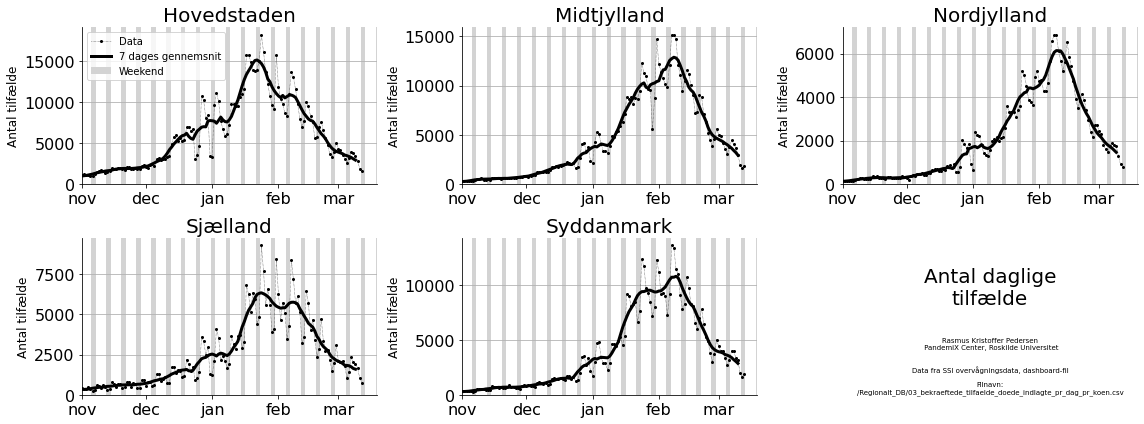

In [9]:
# Compare cases

fig,allAxes = plt.subplots(2,3,figsize=(16,6),tight_layout=True)

# for k in range(1,6):
for k in range(0,5):
    curRegion = allRegions[k]
    curBorgerCount = borgerCount[k]
    # curRegion = allRegions[k-1]
    # curBorgerCount = borgerCount[k-1]
    curdf = groupdf.loc[curRegion,:,:]
    curDates = curdf.index
#     curDates = curdf.index.get_level_values(1)
#     curCase = curdf['Bekræftede tilfælde']
    curCase = curdf['Bekræftede tilfælde i alt']
    # curAdm = curdf['Indlæggelser']
    # curDea = curdf['Døde']

    ax = allAxes.flatten()[k]
    # ax.plot(curDates,curCase)
    # ax.plot(curDates[:-1],curCase[:-1])
    ax.plot(curDates[:-1],curCase[:-1],'k.:',markersize=4,linewidth=0.5,label='Data')
    ax.plot(rnTime(curDates[:-1],meanWidth),rnMean(curCase[:-1],meanWidth),'k',label=f'{meanWidth} dages gennemsnit')

    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 52
    for k in range(-numWeeks,numWeeks):
         curSunday = firstSunday + np.timedelta64(7*k,'D')
         ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax.grid(axis='y')

#     ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
    ax.set_xlim(firstDateShort,lastDate)
    ax.set_xticks(curXticks)
    ax.set_xlim(firstDateShort,lastDate+np.timedelta64(4,'D'))
    ax.set_ylim(bottom=0)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.set_ylabel('Antal tilfælde',fontsize=12)
    ax.set_title(curRegion)
#     ax.grid()

# ax1 = allAxes.flatten()[0]
ax1 = allAxes.flatten()[5]
ax1.axis('off')
txt1 = 'Antal daglige\ntilfælde'
txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv'
ax1.text(0.5, 0.55,txt1,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=20)
ax1.text(0.5, 0,txt2,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=7)

# allAxes.flatten()[1].legend(loc='upper left',fontsize=10)
allAxes.flatten()[0].legend(loc='upper left',fontsize=10)

if saveFigures:
     plt.savefig(path_figs+'/Regionalt/Cases')

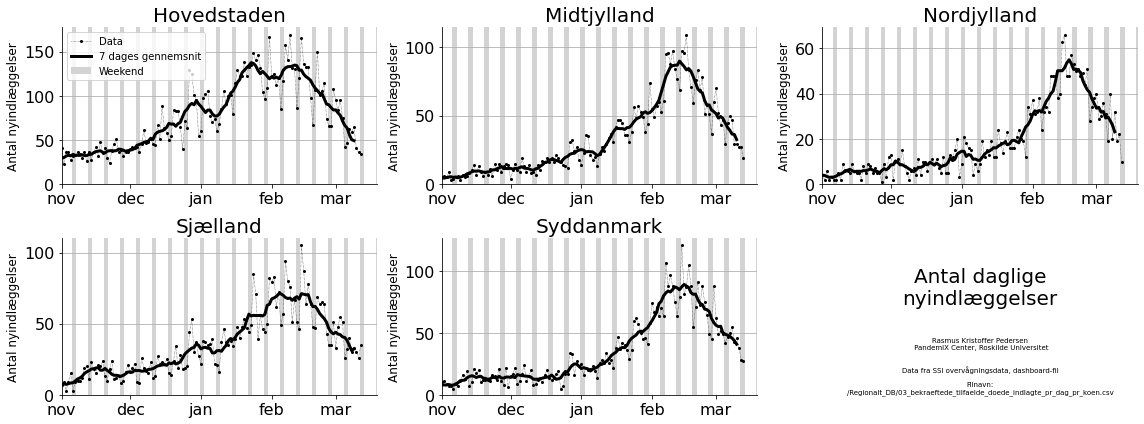

In [10]:
# Compare admissions
fig,allAxes = plt.subplots(2,3,figsize=(16,6),tight_layout=True)

# for k in range(1,6):
for k in range(0,5):
    curRegion = allRegions[k]
    # curRegion = allRegions[k-1]
    # curBorgerCount = borgerCount[k-1]
    curdf = groupdf.loc[curRegion,:,:]
    curDates = curdf.index
#     curDates = curdf.index.get_level_values(1)
    # curCase = curdf['Bekræftede tilfælde']
    curAdm = curdf['Indlæggelser']
    # curDea = curdf['Døde']

    ax = allAxes.flatten()[k]
    # ax.plot(curDates,curAdm)
    # ax.plot(curDates[:-1],curAdm[:-1])
    ax.plot(curDates[:-1],curAdm[:-1],'k.:',markersize=4,linewidth=0.5,label='Data')
    ax.plot(rnTime(curDates[:-1],meanWidth),rnMean(curAdm[:-1],meanWidth),'k',label=f'{meanWidth} dages gennemsnit')

    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 52
    for k in range(-numWeeks,numWeeks):
         curSunday = firstSunday + np.timedelta64(7*k,'D')
         ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax.grid(axis='y')

#     ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
    ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(7,'D'))
    ax.set_xticks(curXticks)
    ax.set_xlim(firstDateShort,lastDate+np.timedelta64(4,'D'))
    ax.set_ylim(bottom=0)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.set_ylabel('Antal nyindlæggelser',fontsize=12)
    ax.set_title(curRegion)
#     ax.grid()

# ax1 = allAxes.flatten()[0]
ax1 = allAxes.flatten()[5]
ax1.axis('off')
txt1 = 'Antal daglige\nnyindlæggelser'
txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv'
# txt2 = 'Data fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv\n\nRasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet'
ax1.text(0.5, 0.55,txt1,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=20)
ax1.text(0.5, 0,txt2,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=7)

# allAxes.flatten()[1].legend(loc='upper left',fontsize=10)
allAxes.flatten()[0].legend(loc='upper left',fontsize=10)

if saveFigures:
     plt.savefig(path_figs+'/Regionalt/Nyindlagte')

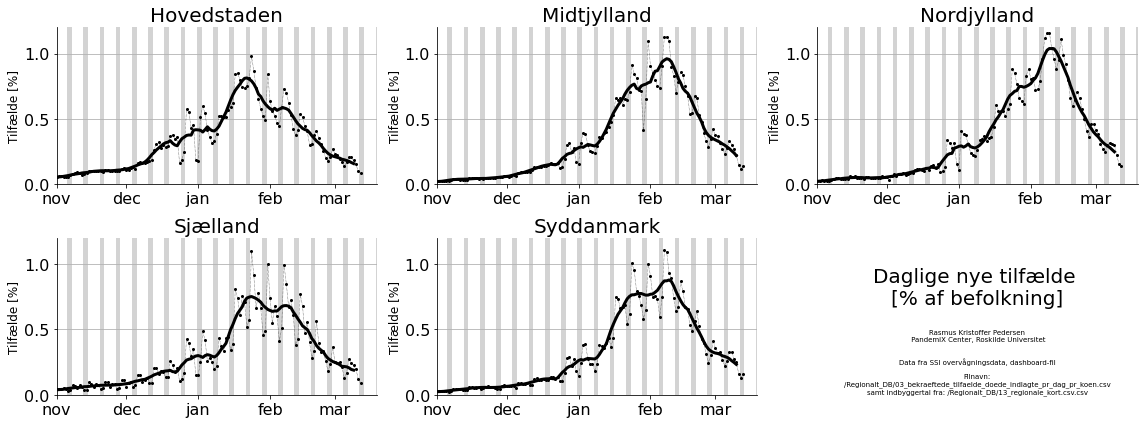

In [11]:
# Compare cases, normalized by antal_bor


fig,allAxes = plt.subplots(2,3,sharey=True,figsize=(16,6),tight_layout=True)

# allMaxs = []

# for k in range(1,6):
#     curRegion = allRegions[k-1]
#     curBorgerCount = borgerCount[k-1]
for k in range(0,5):
    curRegion = allRegions[k]
    curBorgerCount = borgerCount[k]
    curdf = groupdf.loc[curRegion,:,:]
    curDates = curdf.index
#     curDates = curdf.index.get_level_values(1)
#     curCase = curdf['Bekræftede tilfælde']
    curCase = curdf['Bekræftede tilfælde i alt']

    ax = allAxes.flatten()[k]

    # ax.plot(curDates[:-1],curCase[:-1]/curBorgerCount,'k.:',markersize=4,linewidth=0.5)
    # ax.plot(rnTime(curDates[:-1],meanWidth),rnMean(curCase[:-1]/curBorgerCount,meanWidth),'k')
    ax.plot(curDates[:-1],100*curCase[:-1]/curBorgerCount,'k.:',markersize=4,linewidth=0.5)
    ax.plot(rnTime(curDates[:-1],meanWidth),rnMean(100*curCase[:-1]/curBorgerCount,meanWidth),'k')

    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 52
    for k in range(-numWeeks,numWeeks):
         curSunday = firstSunday + np.timedelta64(7*k,'D')
         ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax.grid(axis='y')
#     ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
    ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(7,'D'))
    ax.set_xticks(curXticks)
    ax.set_xlim(firstDateShort,lastDate+np.timedelta64(4,'D'))
    ax.set_ylim(bottom=0)
    ax.set_ylim(top=1.2)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.set_title(curRegion)
#     ax.grid()
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_ylabel('Tilfælde [%]',fontsize=12)

# ax1 = allAxes.flatten()[0]
ax1 = allAxes.flatten()[5]
ax1.axis('off')
txt1 = 'Daglige nye tilfælde \n[% af befolkning]'
txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv\nsamt indbyggertal fra: /Regionalt_DB/13_regionale_kort.csv.csv'
ax1.text(0.5, 0.55,txt1,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=20)
ax1.text(0.5, 0,txt2,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=7)

     
if saveFigures:
     plt.savefig(path_figs+'/Regionalt/CasesPercent')

In [12]:
# # # len(curdf['Bekræftede tilfælde'])
# # plt.figure()
# # plt.plot(curdf['Bekræftede tilfælde'].values[::7])
# curDates[0]

# # meanDates[-8]
# curDates[-1]

# plt.figure()
# # plt.plot(curDates,np.cumsum(curCase)[:-7]-np.cumsum(curCase)[5:])
# weekSum = np.cumsum(curCase)[7:]-np.cumsum(curCase)[:-7]
# plt.plot(curDates[7:],weekSum/7)
# plt.plot(curDates,curCase,'.')
# plt.plot(curDates[6:],rnMean(curCase,7),'.')
# curStart = 5
# plt.plot(curDates[7+curStart::7],weekSum[curStart::7]/7,'.')

# plt.xlim(left=firstDate)
#     #  weekSum = np.cumsum(curCase)[7:]-np.cumsum(curCase)[:-7]
#     #  ax.plot(curDates[7:],weekSum,'m.')

# print(np.sum(curCase[-7:]/7))
# plt.grid()

In [13]:
# Assuming firstDate is a monday (2021-11-01 was a monday)
firstDateIndex = np.where(curDates == firstDate)[0][0]

# curDates[firstDateIndex:]

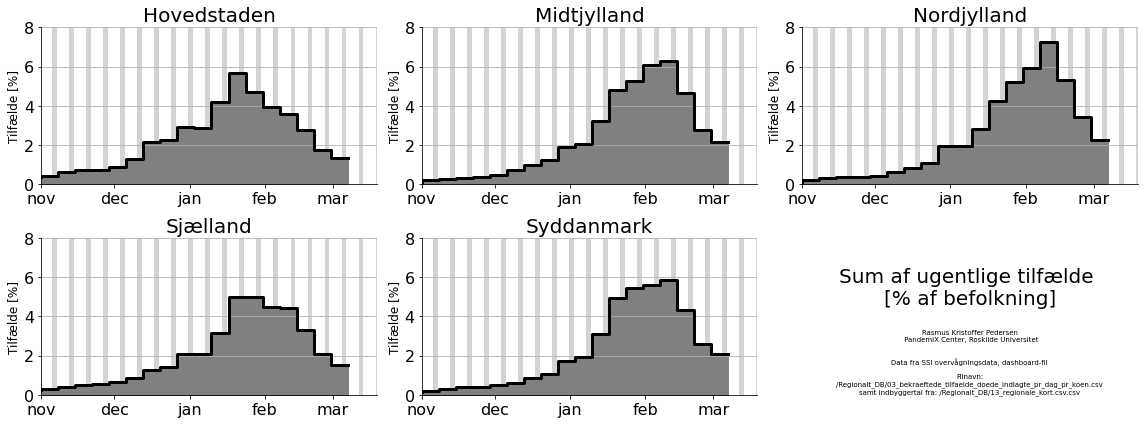

In [14]:
# Compare cases, normalized by antal_bor
fig,allAxes = plt.subplots(2,3,sharey=True,figsize=(16,6),tight_layout=True)

allMax = 0

# for k in range(1,6):
#     curRegion = allRegions[k-1]
#     curBorgerCount = borgerCount[k-1]
for k in range(0,5):
    curRegion = allRegions[k]
    curBorgerCount = borgerCount[k]
    curdf = groupdf.loc[curRegion,:,:]
    curDates = curdf.index.values[:-1]
    # curDates = curdf.index.get_level_values(1).values[:-1]
    # curCase = curdf['Bekræftede tilfælde'].values[:-1]
    curCase = curdf['Bekræftede tilfælde i alt'].values[:-1]
     
    # firstDateIndex = np.where(curDates == firstDate)[0][0]
    firstDateIndex = np.where(curDates == (firstDate-np.timedelta64(7,'D')))[0][0]
    curDates = curDates[firstDateIndex:]   
    curCase = curCase[firstDateIndex:]   

    # Normalize by population size
    curCase = 100*curCase/curBorgerCount

    
    ax = allAxes.flatten()[k]

    weekSum = np.cumsum(curCase)[7:]-np.cumsum(curCase)[:-7]
    allMax = np.max([allMax,np.max(weekSum)])

    weekDates = curDates[7:]
#     ax.plot(curDates,curCase)
#     ax.plot(weekDates,weekSum/7)
    ax.step(weekDates[::7],weekSum[::7],'k',where='pre')
    ax.fill_between(weekDates[::7],weekSum[::7],step='pre',color='grey')
     # ax.step(meanDates[iniIndex::7],meanCase[iniIndex::7],'k',where='pre')
     # ax.fill_between(meanDates[iniIndex::7],meanCase[iniIndex::7],step='pre',color='k',alpha=0.5)

    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 52
    for k in range(-numWeeks,numWeeks):
         curSunday = firstSunday + np.timedelta64(7*k,'D')
         ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax.grid(axis='y')
#     ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
    ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(7,'D'))
    ax.set_xticks(curXticks)
    ax.set_xlim(firstDateShort,lastDate+np.timedelta64(4,'D'))
    ax.set_ylim(bottom=0)
    ax.set_ylim(top=np.ceil(allMax))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.set_title(curRegion)
#     ax.grid()
    ax.yaxis.set_tick_params(labelleft=True)
    ax.set_ylabel('Tilfælde [%]',fontsize=12)

# ax1 = allAxes.flatten()[0]
ax1 = allAxes.flatten()[5]
ax1.axis('off')
# # ax1.set_title('Tilfælde \n[% af befolkning]')
# ax1.text(0.5, 0.75,'Sum af ugentlige tilfælde \n[% af befolkning]',
#      horizontalalignment='center',
#      verticalalignment='center',
#      transform = ax1.transAxes,
#      fontsize=20)

txt1 = 'Sum af ugentlige tilfælde \n[% af befolkning]'
txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv\nsamt indbyggertal fra: /Regionalt_DB/13_regionale_kort.csv.csv'
ax1.text(0.5, 0.55,txt1,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=20)
ax1.text(0.5, 0,txt2,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=7)
     
if saveFigures:
     plt.savefig(path_figs+'/Regionalt/CasesPercentWeek')

In [15]:
# # Compare cases, normalized by antal_bor
# fig,allAxes = plt.subplots(2,3,sharey=True,figsize=(16,6),tight_layout=True)


# # for k in range(1,6):
# #     curRegion = allRegions[k-1]
# #     curBorgerCount = borgerCount[k-1]
# for k in range(0,5):
#      curRegion = allRegions[k]
#      curBorgerCount = borgerCount[k]
#      curdf = groupdf.loc[curRegion,:,:]
#      curDates = curdf.index.get_level_values(1).values[:-1]
#      curCase = curdf['Bekræftede tilfælde'].values[:-1]

#      ax = allAxes.flatten()[k]

#      meanDates = rnTime(curDates,meanWidth)
#      meanCase = meanWidth*100*rnMean(curCase,meanWidth)/curBorgerCount
#      # ax.step(meanDates,meanCase,'k',where='mid')
#      # ax.step(meanDates[5::7],meanCase[5::7],'k')
#      # ax.step(meanDates[::7],meanCase[::7],'k',where='mid')
#      iniIndex = 3
#      ax.step(meanDates[iniIndex::7],meanCase[iniIndex::7],'k',where='pre')
#      ax.fill_between(meanDates[iniIndex::7],meanCase[iniIndex::7],step='pre',color='k',alpha=0.5)



#      ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
#      ax.set_xticks(curXticks)
#      ax.set_ylim(bottom=0)
#      ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#      ax.spines['top'].set_visible(False) 
#      ax.spines['right'].set_visible(False) 
#      ax.set_title(curRegion)
#      ax.grid()
#      ax.yaxis.set_tick_params(labelleft=True)
#      ax.set_ylabel('Tilfælde [%]',fontsize=12)

# # ax1 = allAxes.flatten()[0]
# ax1 = allAxes.flatten()[5]
# ax1.axis('off')
# # # ax1.set_title('Tilfælde \n[% af befolkning]')
# # ax1.text(0.5, 0.75,'Sum af ugentlige tilfælde \n[% af befolkning]',
# #      horizontalalignment='center',
# #      verticalalignment='center',
# #      transform = ax1.transAxes,
# #      fontsize=20)

# txt1 = 'Sum af ugentlige tilfælde \n[% af befolkning]'
# txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv\nsamt indbyggertal fra: /Regionalt_DB/13_regionale_kort.csv.csv'
# ax1.text(0.5, 0.55,txt1,
#      horizontalalignment='center',
#      verticalalignment='bottom',
#      transform = ax1.transAxes,
#      fontsize=20)
# ax1.text(0.5, 0,txt2,
#      horizontalalignment='center',
#      verticalalignment='bottom',
#      transform = ax1.transAxes,
#      fontsize=7)
     
# if saveFigures:
#      plt.savefig(path_figs+'/Regionalt/CasesPercentWeekOld')

In [16]:
# curDates[startIndex]

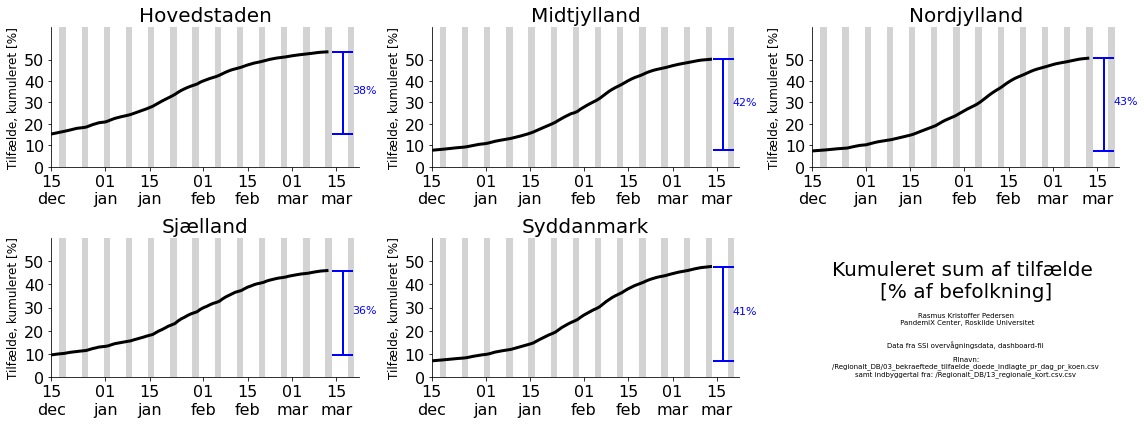

In [29]:
# Compare cases, normalized by antal_bor


fig,allAxes = plt.subplots(2,3,figsize=(16,6),tight_layout=True)

# allMaxs = []

firstDate = np.datetime64('2021-12-15')
firstDateShort = np.datetime64('2021-12-15')
curXticks_Short = np.array([np.datetime64(x) for x in [
     '2021-12-15',
     '2022-01-01',
     '2022-01-15',
     '2022-02-01',
     '2022-02-15',
     '2022-03-01',
     '2022-03-15',
     '2022-04-01',
     '2022-04-15',
     '2022-05-01',
     '2022-05-15',
     '2022-06-01',
     '2022-06-15',
]])
# for k in range(1,6):
#     curRegion = allRegions[k-1]
#     curBorgerCount = borgerCount[k-1]
for k in range(0,5):
     curRegion = allRegions[k]
     curBorgerCount = borgerCount[k]
     curdf = groupdf.loc[curRegion,:,:]
     curDates = curdf.index.values[:-1]
#      curDates = curdf.index.get_level_values(1).values[:-1]
     # curCase = curdf['Bekræftede tilfælde'].values[:-1]
     curCase = curdf['Bekræftede tilfælde i alt'].values[:-1]
     curCumSum = np.cumsum(curCase)

     ax = allAxes.flatten()[k]

     ax.plot(curDates,100*curCumSum/curBorgerCount,'k')

     # Calculate difference
     startIndex = np.where(curDates == firstDate)[0][0]

     latestSum = 100 * curCumSum[-1]/curBorgerCount
     startSum =  100 * curCumSum[startIndex]/curBorgerCount
     midSum = (latestSum+startSum)/2
     diffSum = latestSum-startSum

     annoDate = lastDate+np.timedelta64(2,'D')
     annoDate1 = annoDate - np.timedelta64(3,'D')
     annoDate2 = annoDate + np.timedelta64(3,'D')
     annoColor = 'b'
     # ax.plot([annoDate,annoDate],[startSum,latestSum],'m_-',markersize=20,linewidth=3)
     ax.plot([annoDate,annoDate],[startSum,latestSum],color=annoColor,linewidth=2)
     ax.plot([annoDate1,annoDate2],[startSum,startSum],color=annoColor,linewidth=2)
     ax.plot([annoDate1,annoDate2],[latestSum,latestSum],color=annoColor,linewidth=2)
     ax.text(annoDate2,midSum,f'{diffSum:2.0f}%',color=annoColor,fontsize=11,fontvariant='small-caps')#fontfamily='serif')
     #     ax.text(annoDate2,midSum,f'{diffSum:2.2f}%',color=annoColor,fontsize=11,fontvariant='small-caps')#fontfamily='serif')


     # Draw weekends
     firstSunday = np.datetime64('2021-10-03')
     numWeeks = 52
     for k in range(-numWeeks,numWeeks):
          curSunday = firstSunday + np.timedelta64(7*k,'D')
          ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
     ax.grid(axis='y')


     # Make figure nice
     # ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
     ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(14,'D'))
     ax.set_xticks(curXticks_Short)
     ax.set_xlim(firstDateShort,lastDate+np.timedelta64(7,'D'))
     ax.set_yticks(np.arange(0,60,10))
     ax.set_ylim(bottom=0)
     ax.set_ylim(top=latestSum*1.2)
     ax.set_ylim(top=np.ceil(latestSum*1.2/5)*5)
     ax.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
     ax.spines['top'].set_visible(False) 
     ax.spines['right'].set_visible(False) 
     ax.set_title(curRegion)
     # ax.grid()
     ax.grid(axis='y')
     ax.yaxis.set_tick_params(labelleft=True)
     ax.set_ylabel('Tilfælde, kumuleret [%]',fontsize=12)

# ax1 = allAxes.flatten()[0]
ax1 = allAxes.flatten()[5]
ax1.axis('off')

txt1 = 'Kumuleret sum af tilfælde \n[% af befolkning]'
txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv\nsamt indbyggertal fra: /Regionalt_DB/13_regionale_kort.csv.csv'
ax1.text(0.5, 0.55,txt1,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=20)
ax1.text(0.5, 0,txt2,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=7)
     
if saveFigures:
     plt.savefig(path_figs+'/Regionalt/CasesCumulative')

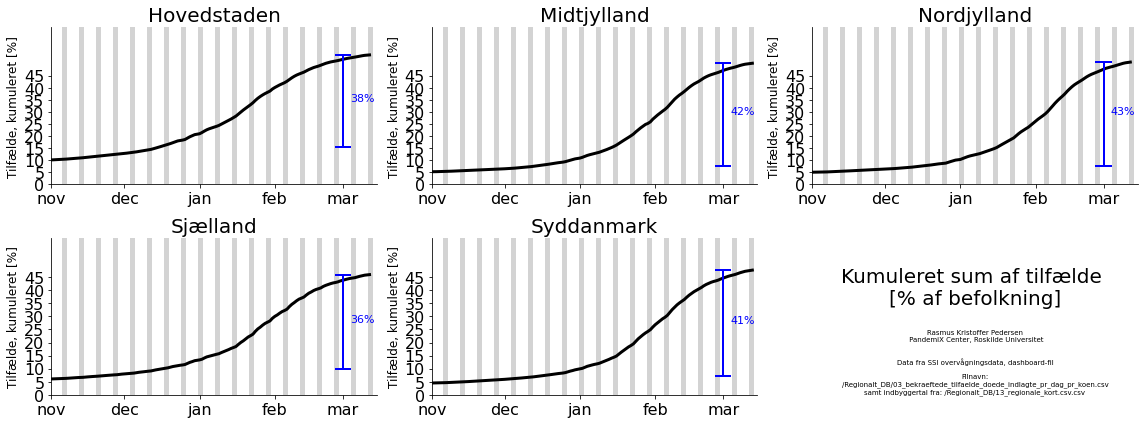

In [30]:
# Compare cases, normalized by antal_bor


fig,allAxes = plt.subplots(2,3,figsize=(16,6),tight_layout=True)

# allMaxs = []


# for k in range(1,6):
#     curRegion = allRegions[k-1]
#     curBorgerCount = borgerCount[k-1]
for k in range(0,5):
     curRegion = allRegions[k]
     curBorgerCount = borgerCount[k]
     curdf = groupdf.loc[curRegion,:,:]
     curDates = curdf.index.values[:-1]
#     curDates = curdf.index.get_level_values(1)
     # curDates = curdf.index.get_level_values(1).values[:-1]
     # curCase = curdf['Bekræftede tilfælde'].values[:-1]
     curCase = curdf['Bekræftede tilfælde i alt'].values[:-1]
     curCumSum = np.cumsum(curCase)

     ax = allAxes.flatten()[k]

     ax.plot(curDates,100*curCumSum/curBorgerCount,'k')

     # Calculate difference
     startIndex = np.where(curDates == firstDate)[0][0]

     latestSum = 100 * curCumSum[-1]/curBorgerCount
     startSum =  100 * curCumSum[startIndex]/curBorgerCount
     midSum = (latestSum+startSum)/2
     diffSum = latestSum-startSum

     annoDate = lastDate-np.timedelta64(14,'D')
     annoDate1 = annoDate - np.timedelta64(3,'D')
     annoDate2 = annoDate + np.timedelta64(3,'D')
     annoColor = 'b'
     # ax.plot([annoDate,annoDate],[startSum,latestSum],'m_-',markersize=20,linewidth=3)
     ax.plot([annoDate,annoDate],[startSum,latestSum],color=annoColor,linewidth=2)
     ax.plot([annoDate1,annoDate2],[startSum,startSum],color=annoColor,linewidth=2)
     ax.plot([annoDate1,annoDate2],[latestSum,latestSum],color=annoColor,linewidth=2)
     ax.text(annoDate2,midSum,f'{diffSum:2.0f}%',color=annoColor,fontsize=11,fontvariant='small-caps')#fontfamily='serif')
     #     ax.text(annoDate2,midSum,f'{diffSum:2.2f}%',color=annoColor,fontsize=11,fontvariant='small-caps')#fontfamily='serif')


     # Draw weekends
     firstSunday = np.datetime64('2021-10-03')
     numWeeks = 52
     for k in range(-numWeeks,numWeeks):
          curSunday = firstSunday + np.timedelta64(7*k,'D')
          ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
     ax.grid(axis='y')


     # Make figure nice
     # ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
     ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(14,'D'))
     ax.set_xticks(curXticks)
     ax.set_yticks(np.arange(0,50,5))
     ax.set_ylim(bottom=0)
     ax.set_ylim(top=latestSum*1.2)
     ax.set_ylim(top=np.ceil(latestSum*1.2/5)*5)
     ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
     ax.spines['top'].set_visible(False) 
     ax.spines['right'].set_visible(False) 
     ax.set_title(curRegion)
     # ax.grid()
     ax.grid(axis='y')
     ax.yaxis.set_tick_params(labelleft=True)
     ax.set_ylabel('Tilfælde, kumuleret [%]',fontsize=12)

# ax1 = allAxes.flatten()[0]
ax1 = allAxes.flatten()[5]
ax1.axis('off')

txt1 = 'Kumuleret sum af tilfælde \n[% af befolkning]'
txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv\nsamt indbyggertal fra: /Regionalt_DB/13_regionale_kort.csv.csv'
ax1.text(0.5, 0.55,txt1,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=20)
ax1.text(0.5, 0,txt2,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=7)
     
if saveFigures:
     plt.savefig(path_figs+'/Regionalt/CasesCumulativeNov')

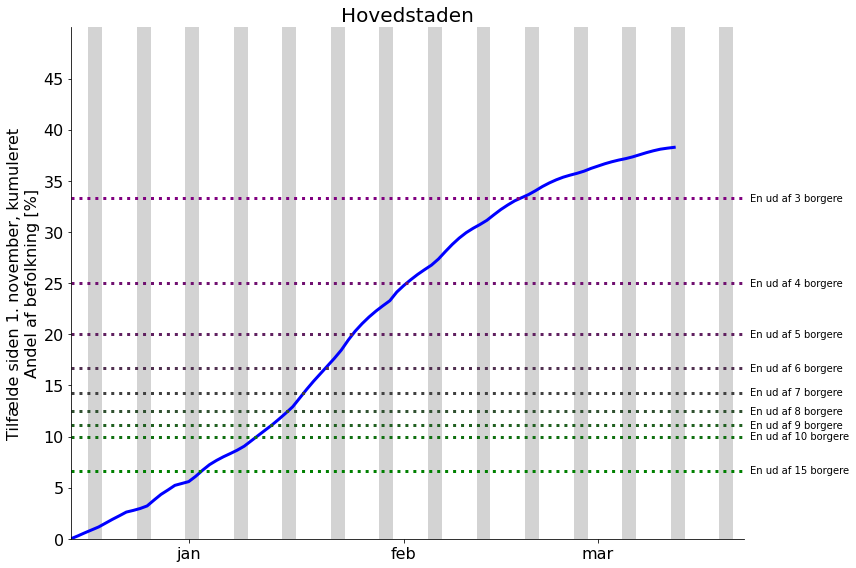

In [31]:
# Compare cases, normalized by antal_bor


# fig,allAxes = plt.subplots(2,3,figsize=(16,6),tight_layout=True)
fig,ax = plt.subplots(tight_layout=True) 

# allMaxs = []


# for k in range(1,6):
#     curRegion = allRegions[k-1]
#     curBorgerCount = borgerCount[k-1]
# for k in range(0,5):
k = 0 
curRegion = allRegions[k]
curBorgerCount = borgerCount[k]
curdf = groupdf.loc[curRegion,:,:]
curDates = curdf.index.values[:-1]
# curDates = curdf.index.get_level_values(1).values[:-1]
# curCase = curdf['Bekræftede tilfælde'].values[:-1]
curCase = curdf['Bekræftede tilfælde i alt'].values[:-1]
curCumSum = np.cumsum(curCase)

# ax = allAxes.flatten()[k]

# ax.plot(curDates,100*curCumSum/curBorgerCount,'k')

# Calculate difference
startIndex = np.where(curDates == firstDate)[0][0]

latestSum = 100 * curCumSum[-1]/curBorgerCount
startSum =  100 * curCumSum[startIndex]/curBorgerCount
midSum = (latestSum+startSum)/2
diffSum = latestSum-startSum

annoDate = lastDate+np.timedelta64(2,'D')
annoDate1 = annoDate - np.timedelta64(3,'D')
annoDate2 = annoDate + np.timedelta64(3,'D')
annoColor = 'b'


# # ax.plot([annoDate,annoDate],[startSum,latestSum],'m_-',markersize=20,linewidth=3)
# ax.plot([annoDate,annoDate],[startSum,latestSum],color=annoColor,linewidth=2)
# ax.plot([annoDate1,annoDate2],[startSum,startSum],color=annoColor,linewidth=2)
# ax.plot([annoDate1,annoDate2],[latestSum,latestSum],color=annoColor,linewidth=2)
# ax.text(annoDate2,midSum,f'{diffSum:2.0f}%',color=annoColor,fontsize=11,fontvariant='small-caps')#fontfamily='serif')
# #     ax.text(annoDate2,midSum,f'{diffSum:2.2f}%',color=annoColor,fontsize=11,fontvariant='small-caps')#fontfamily='serif')

curCumSumRatio = 100*((curCumSum)/curBorgerCount)
ax.plot(curDates,curCumSumRatio - startSum,'b')

# Show fractional numbers
# fracsToShow = np.arange(2,11)
fracsToShow = [3,4,5,6,7,8,9,10,15,20]
fracsToShow = [3,4,5,6,7,8,9,10,15]
# fracsToShow = [5,6,7,8,9,10,11,12,13,14,15,20,25,30,40,50,100,200]
# fracsToShow = [5,6,7,10,15,20]

import matplotlib.colors
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","xkcd:mauve","green"],len(fracsToShow))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["purple","green"],len(fracsToShow))

# curFrac = 100/7
# for curFrac in fracsToShow:
for i in range(len(fracsToShow)):
     curFrac = fracsToShow[i]
     curLabel = f'En ud af {curFrac} borgere'
     # ax.plot([firstDate,lastDate],[100/curFrac,100/curFrac],':',color=cmap(i),label=curLabel)
     ax.axhline(100/curFrac,linestyle=':',color=cmap(i),label=curLabel)
     ax.text(lastDate+np.timedelta64(8,'D'),100/curFrac,curLabel,va='center')



# Draw weekends
firstSunday = np.datetime64('2021-10-03')
numWeeks = 52
for k in range(-numWeeks,numWeeks):
     curSunday = firstSunday + np.timedelta64(7*k,'D')
     ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
ax.grid(axis='y')

# ax.legend()
# ax.legend(bbox_to_anchor=(1.04,0.5), loc="center left")

# Make figure nice
# ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(12,'h'))
ax.set_xlim(firstDateShort,lastDateShort+np.timedelta64(7,'D'))
ax.set_xticks(curXticks)
ax.set_xlim(firstDateShort,lastDate+np.timedelta64(7,'D'))
ax.set_yticks(np.arange(0,50,5))
ax.set_ylim(bottom=0)
# ax.set_ylim(top=latestSum*1.2)
# ax.set_ylim(top=np.ceil(latestSum*1.2/5)*5)
ax.set_ylim(top=np.ceil((latestSum-startSum)*1.2/5)*5)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax.spines['top'].set_visible(False) 
ax.spines['right'].set_visible(False) 
ax.set_title(curRegion)
# ax.grid()
ax.grid(axis='y')
ax.yaxis.set_tick_params(labelleft=True)
ax.set_ylabel('Tilfælde siden 1. november, kumuleret\nAndel af befolkning [%]',fontsize=16)

# Show understandable counts


if saveFigures:
     plt.savefig(path_figs+'/Regionalt/HovedstadenKumulativtNovemberTilNu')

In [32]:
# curCase[-10:]
# curdf
# df[df.Region == curRegion]
# df
latestSum

53.59471826298318

In [33]:
# print(kortdf['Bekræftede tilfælde de senest 7 dage']/kortdf['antal_bor'])
# print(kortdf['Bekræftede tilfælde']/kortdf['antal_bor'])
# kortdf

In [34]:
45000/1862046

0.024166964725898285

In [35]:
# # curdf['Døde']
# # curdf.tail(20)
# # curdf.Døde.index[:,1]
# curdeath = df[df.Region == 'Hovedstaden']['Døde'].values
# curdays = df[df.Region == 'Hovedstaden']['Prøvetagningsdato']
# plt.figure()
# # plt.plot(curdays,curdeath,'.:')
# plt.plot(rnTime(curdays,7),rnMean(curdeath,7)*7)

# plt.xlim(left=np.datetime64('2021-11-01'))

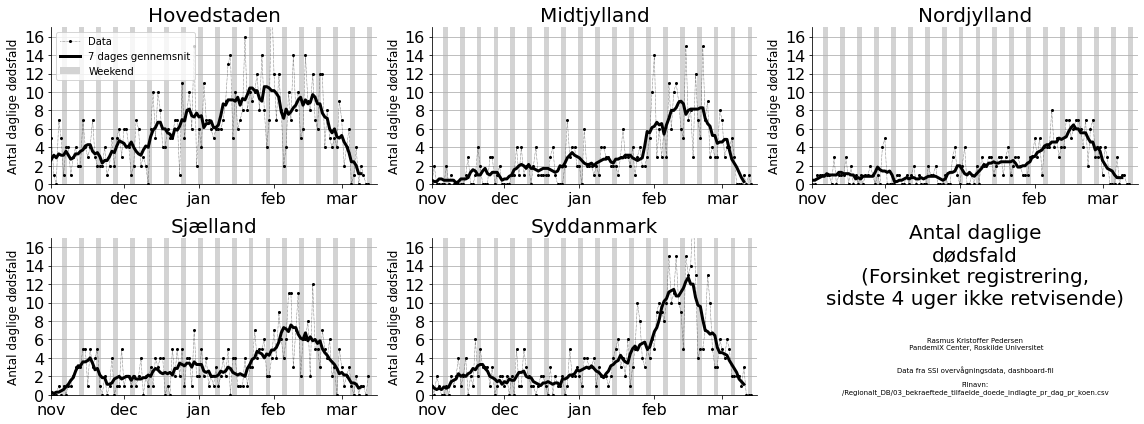

In [38]:
# Compare admissions
fig,allAxes = plt.subplots(2,3,figsize=(16,6),tight_layout=True)

# for k in range(1,6):
for k in range(0,5):
    curRegion = allRegions[k]
    # curRegion = allRegions[k-1]
    # curBorgerCount = borgerCount[k-1]
    curdf = groupdf.loc[curRegion,:,:]
    curDates = curdf.index
#     curDates = curdf.index.get_level_values(1)
    # curCase = curdf['Bekræftede tilfælde']
#     curAdm = curdf['Indlæggelser']
    curDea = curdf['Døde']

    ax = allAxes.flatten()[k]
    # ax.plot(curDates,curDea)
    # ax.plot(curDates[:-1],curDea[:-1])
    ax.plot(curDates[:-1],curDea[:-1],'k.:',markersize=4,linewidth=0.5,label='Data')
    ax.plot(rnTime(curDates[:-1],meanWidth),rnMean(curDea[:-1],meanWidth),'k',label=f'{meanWidth} dages gennemsnit')

    # Draw weekends
    firstSunday = np.datetime64('2021-10-03')
    numWeeks = 52
    for k in range(-numWeeks,numWeeks):
         curSunday = firstSunday + np.timedelta64(7*k,'D')
         ax.axvspan(curSunday-np.timedelta64(1,'D')-np.timedelta64(12,'h'),curSunday+np.timedelta64(12,'h'),zorder=-1,facecolor='lightgrey',label=int(k==0)*'Weekend')
    ax.grid(axis='y')

    ax.set_xlim(firstDateShort,lastDate+np.timedelta64(12,'h'))
    ax.set_xticks(curXticks)
    ax.set_ylim(bottom=0)
     
    curMax = 17
    ax.set_ylim(top=curMax)
    ax.set_yticks(np.arange(0,curMax,2))

    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
    ax.spines['top'].set_visible(False) 
    ax.spines['right'].set_visible(False) 
    ax.set_ylabel('Antal daglige dødsfald',fontsize=12)
    ax.set_title(curRegion)
#     ax.grid()

# ax1 = allAxes.flatten()[0]
ax1 = allAxes.flatten()[5]
ax1.axis('off')
txt1 = 'Antal daglige\ndødsfald\n(Forsinket registrering,\nsidste 4 uger ikke retvisende)'
txt2 = 'Rasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet\n\n\nData fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv'
# txt2 = 'Data fra SSI overvågningsdata, dashboard-fil\n\nFilnavn:\n/Regionalt_DB/03_bekraeftede_tilfaelde_doede_indlagte_pr_dag_pr_koen.csv\n\nRasmus Kristoffer Pedersen\n PandemiX Center, Roskilde Universitet'
ax1.text(0.5, 0.55,txt1,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=20)
ax1.text(0.5, 0,txt2,
     horizontalalignment='center',
     verticalalignment='bottom',
     transform = ax1.transAxes,
     fontsize=7)

# allAxes.flatten()[1].legend(loc='upper left',fontsize=10)
allAxes.flatten()[0].legend(loc='upper left',fontsize=10)

if saveFigures:
     plt.savefig(path_figs+'/Regionalt/Deaths')